In [1]:
import pandas as pd

In [2]:
prefix = "../datasets/titanic/"

In [3]:
data = pd.read_csv(prefix + "train.csv")
labels = pd.read_csv(prefix + "genderclassmodel.csv")

## Dataset information

From [here](https://www.kaggle.com/c/titanic/data).

```
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
def count_nan(df):
    """Counts the missing (NaN) values in a dataframe. Returns a 
    pandas.Series object that indicates the number of NaN values
    per row.
    
    http://stackoverflow.com/a/26266451/2014591
    """
    return df.isnull().sum()

In [6]:
count_nan(data)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
len(data)

891

In [8]:
## Try a simple model. Use only 4 features.
features = ["Pclass", "Sex", "Fare", "Embarked", "Survived"]
subset = data[features]

In [9]:
subset.head()

,Pclass,Sex,Fare,Embarked,Survived
0,3,male,7.2500,S,0
1,1,female,71.2833,C,1
2,3,female,7.9250,S,1
3,1,female,53.1000,S,1
4,3,male,8.0500,S,0


In [10]:
y = subset["Survived"]
X = subset.drop("Survived", axis=1)

## The quick and easy experimentation procedure

1. Make your train test split
2. Encode the categorical variables, scale the variables
3. Fit and evaluate the model

In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Analyzing who lived or died, based upon fare

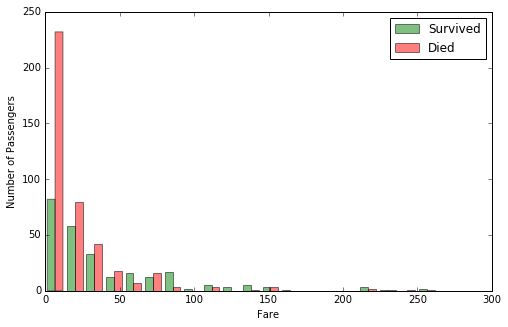

In [13]:
# Plot a histogram of the fares
# http://stackoverflow.com/a/6873956/2014591   <- plotting two histograms at once
%matplotlib inline
import matplotlib.pyplot as plt

# Way to change sizes of plots
# http://stackoverflow.com/a/332311/2014591
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5  

survived = X_train[y_train == 1]
died = X_train[y_train == 0]

# Remove more data
survived = survived[~(survived["Fare"] > 300)]

# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist
plt.hist([survived["Fare"], died["Fare"]], alpha=0.5, color=['g', 'r'], label=["Survived", "Died"], bins=20)
#plt.hist(, alpha=0.5, color='r', label="Died", bins=20)
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.legend()

## Analyzing people who lived or died, based upon gender

In [14]:
survived = X_train[y_train == 1]
died = X_train[y_train == 0]

print "SURVIVORS"
print survived["Sex"].value_counts()
print survived["Sex"].value_counts() / len(survived)
print ""  # Newline

print "PEOPLE WHO DIED"
print died["Sex"].value_counts()
print died["Sex"].value_counts() / len(died)

SURVIVORS
female    174
male       84
Name: Sex, dtype: int64
female    0.674419
male      0.325581
Name: Sex, dtype: float64

PEOPLE WHO DIED
male      353
female     57
Name: Sex, dtype: int64
male      0.860976
female    0.139024
Name: Sex, dtype: float64


## Analyzing people who lived or died, based upon which port they came from

In [15]:
survived = X_train[y_train == 1]
died = X_train[y_train == 0]

print "SURVIVORS"
print survived["Embarked"].value_counts()
print survived["Embarked"].value_counts() / len(survived)
print ""  # Newline

print "PEOPLE WHO DIED"
print died["Embarked"].value_counts()
print died["Embarked"].value_counts() / len(died)

SURVIVORS
S    169
C     63
Q     24
Name: Embarked, dtype: int64
S    0.655039
C    0.244186
Q    0.093023
Name: Embarked, dtype: float64

PEOPLE WHO DIED
S    321
C     53
Q     36
Name: Embarked, dtype: int64
S    0.782927
C    0.129268
Q    0.087805
Name: Embarked, dtype: float64


In [16]:
# The distribution overall looks the same... 

## Build a baseline classifier that we want to beat

In [17]:
# Encode the categorical variables
_X_train = pd.get_dummies(X_train, columns=["Pclass", "Sex", "Embarked"])
_X_test = pd.get_dummies(X_test, columns=["Pclass", "Sex", "Embarked"])

# Only doing this beacuse encoding might not be preserved
# This checks that the column of the training and test set are aligned
assert (_X_train.columns == _X_test.columns).all()  

In [18]:
predictions = RandomForestClassifier().fit(_X_train, y_train).predict(_X_test)
accuracy_score(y_test, predictions)

0.80269058295964124

In [19]:
## Let's try scaling some features now.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(_X_train["Fare"])
_X_train["Fare"] = scaler.transform(_X_train["Fare"])
_X_test["Fare"] = scaler.transform(_X_test["Fare"])

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

In [20]:
predictions = RandomForestClassifier().fit(_X_train, y_train).predict(_X_test)
accuracy_score(y_test, predictions)

0.80269058295964124

## Starting over... 

We dropped the features "PassengerId", "Age", "Cabin", "SibSp", and "Parch". A good guess is that "Age" is a good indication of whether a passenger died or not.

In [21]:
features = ["Pclass", "Sex", "Fare", "Embarked", "Survived", "Age"]
subset = data[features]

In [22]:
subset.head()

,Pclass,Sex,Fare,Embarked,Survived,Age
0,3,male,7.2500,S,0,22
1,1,female,71.2833,C,1,38
2,3,female,7.9250,S,1,26
3,1,female,53.1000,S,1,35
4,3,male,8.0500,S,0,35


In [23]:
X = subset.drop("Survived", axis=1)
y = subset["Survived"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [25]:
# Plot a histogram of the ages
# http://stackoverflow.com/a/6873956/2014591   <- plotting two histograms at once
%matplotlib inline
import matplotlib.pyplot as plt

# Way to change sizes of plots
# http://stackoverflow.com/a/332311/2014591
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5  

survived = X_train[y_train == 1]
died = X_train[y_train == 0]

# Need to also drop NaN values
survived = survived.dropna()
died = died.dropna()

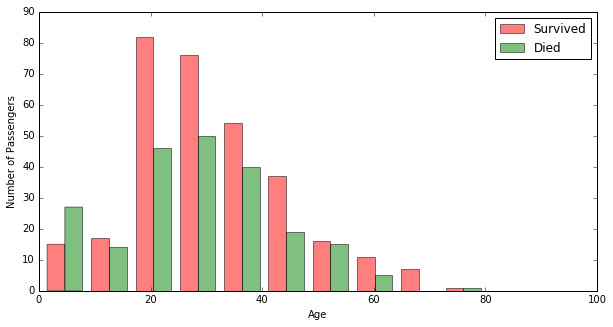

In [26]:
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist
plt.hist([died["Age"], survived["Age"]], alpha=0.5, color=['r', 'g'], label=["Survived", "Died"])

plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.xlim(0, 100)
plt.legend()

In [27]:
X_train.head()

,Pclass,Sex,Fare,Embarked,Age
105,3,male,7.8958,S,28
68,3,female,7.9250,S,17
253,3,male,16.1000,S,30
320,3,male,7.2500,S,22
706,2,female,13.5000,S,45


In [28]:
X_test.head()

,Pclass,Sex,Fare,Embarked,Age
495,3,male,14.4583,C,NaN
648,3,male,7.5500,S,NaN
278,3,male,29.1250,Q,7
31,1,female,146.5208,C,NaN
255,3,female,15.2458,C,29


## Filling in missing values

This is called imputation. In this case, we're going to use the mean of the age to impute. There are other strategies for imputation.

In [29]:
X_train["Age"].describe()

count    535.000000
mean      29.900000
std       14.487993
min        0.670000
25%       21.000000
50%       29.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [30]:
mean = X_train["Age"].describe()["mean"]

In [31]:
X_train["Age"] = X_train["Age"].fillna(mean)
X_test["Age"] = X_test["Age"].fillna(mean)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [32]:
# Encode the categorical variables
_X_train = pd.get_dummies(X_train, columns=["Pclass", "Sex", "Embarked"])
_X_test = pd.get_dummies(X_test, columns=["Pclass", "Sex", "Embarked"])

# Only doing this beacuse encoding might not be preserved
# This checks that the column of the training and test set are aligned
assert (_X_train.columns == _X_test.columns).all()  

In [35]:
clf = RandomForestClassifier(random_state=0).fit(_X_train, y_train)
predictions = clf.predict(_X_test)
accuracy_score(y_test, predictions)

0.82959641255605376

In [36]:
judging = pd.read_csv(prefix + "test.csv")
judging.head()
features.remove("Survived")
subset = judging[features]
subset = subset.fillna(mean)
_X_test = pd.get_dummies(subset, columns=["Pclass", "Sex", "Embarked"])

In [37]:
predictions = clf.predict(_X_test)

In [40]:
output = pd.DataFrame(data=predictions, columns=["Survived"])

In [43]:
output["PassengerId"] = range(892, 892 + len(output))

In [45]:
output = output[["PassengerId", "Survived"]]

In [47]:
output.to_csv("first_submission.csv", index=False)